### Pseudocódigo

0. Dar $x_0$ y $k=0$.
1. Si $f(x_k)=0$, parar y retornar $x_k$.
2. Si $f'(x_k)=0$, parar porque el método no puede continuar.
3. Definir $$x_{k+1}=x_{k}-\frac{f(x_k)}{f'(x_k)}.$$
4. Hacer $k\leftarrow k+1$ e ir al paso 1.
___

## Criterios de detención

1. $|f(x_k)|<\varepsilon$ y $|x_{k}-x_{k-1}|<\delta$, o
2. $k>N$.
___

In [29]:
def rNewton(f,Df,x0,ftol=1e-6,xtol=1e-6,Niter=100,historico=False):
  '''Ejecuta el método de Newton para hallar una raíz de f, donde
    f: función a valores reales
    Df: función derivada de f
    x0: punto inicial
    ftol: tolerancia de error en f
    xtol: tolerancia de error en x
    Niter: máximo de iteraciones permitidas    
    historico: True o False para retornar todas las iteraciones
  El método para si |f(x_k)|<ftol y |x_k-x_{k-1}|<xtol, o k=Niter'''
  x=x0
  xhist=[x]
  paradaX=True
  for k in range(Niter+1):
    fx=f(x)
    paradaF=(abs(fx)<ftol)
    Dfx=Df(x)
    paradaDF=(1+abs(Dfx)>1)
    if paradaF and paradaX:
      print("La raíz es x=",x)
      return xhist
    if not paradaDF:
      print("La derivada de la función es ",Dfx)
      return xhist
    d=-fx/Dfx
    paradaX=(abs(d)<xtol)
    x=x+d
    if historico:
      xhist.append(x)
    else:
      xhist=x

  print("Máximo de iteraciones alcanzado")
  return xhist


In [3]:
# veamos como ver la ayuda sin tener que ir a buscarla a donde escribimos la función
help(rNewton)

Help on function rNewton in module __main__:

rNewton(f, Df, x0, ftol=1e-06, xtol=1e-06, Niter=100, historico=False)
    Ejecuta el método de Newton para hallar una raíz de f, donde
      f: función a valores reales
      Df: función derivada de f
      x0: punto inicial
      ftol: tolerancia de error en f
      xtol: tolerancia de error en x
      Niter: máximo de iteraciones permitidas    
      historico: True o False para retornar todas las iteraciones
    El método para si |f(x_k)|<ftol y |x_k-x_{k-1}|<xtol, o k=Niter



___
### Ejemplo

Veamos como funciona el método para las siguientes funciones:
$$
f(x)=x^3+4x^2-10,
$$
y
$$
f(x)=(x-1)^{11}.
$$

In [4]:
def fun_ejm(x):
  return x**3+4*x**2-10

def Dfun_ejm(x):
  return 3*x**2+8*x

def fun_plana(x):
  return (x-1)**11

def Dfun_plana(x):
  return 11*(x-1)**10


In [5]:
# carguemos primero los módulos necesarios para graficarlas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

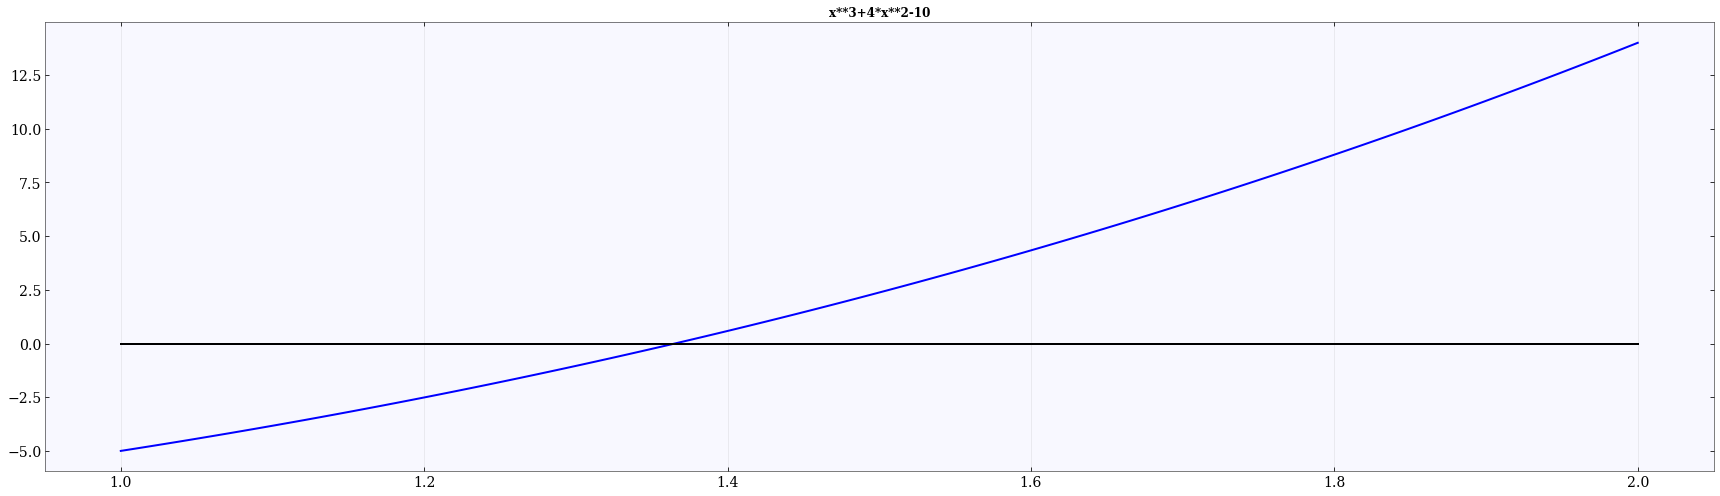

In [20]:
# grafiquemos la primera función
a=1; b=2  # extremos del intervalo
x = np.linspace(a, b, 100)
fun_ejm_vec=np.vectorize(fun_ejm)

plt.figure(figsize=(24,7))
plt.plot(x, fun_ejm_vec(x),'b')
plt.plot([a,b],[0,0],'k')  # eje x
plt.title('x**3+4*x**2-10')
plt.grid(axis='both')

In [7]:
# lo ejecutemos para la función fun_ejm
solnwt=rNewton(fun_ejm,Dfun_ejm,2)
print(solnwt)
# ahora recuperemos todos los puntos de la sucesión
hisnwt=rNewton(fun_ejm,Dfun_ejm,2,historico=True)
print(hisnwt)

La raíz es x= 1.3652300134140969
1.3652300134140969
La raíz es x= 1.3652300134140969
[2, 1.5, 1.3733333333333333, 1.3652620148746266, 1.3652300139161466, 1.3652300134140969]


In [8]:
# analicemos la velocidad de convergencia
print("cantidad de iteraciones= ",len(hisnwt))
ahisnwt=np.array(hisnwt)
E=abs(ahisnwt[1:]-ahisnwt[:-1])
print(E)
Elin=E[1:]/E[:-1]
Ecuad=E[1:]/E[:-1]**2
print(Elin)
print(Ecuad)

cantidad de iteraciones=  6
[5.00000000e-01 1.26666667e-01 8.07131846e-03 3.20009585e-05
 5.02049735e-10]
[2.53333333e-01 6.37209352e-02 3.96477461e-03 1.56885843e-05]
[0.50666667 0.50306001 0.49121771 0.49025358]


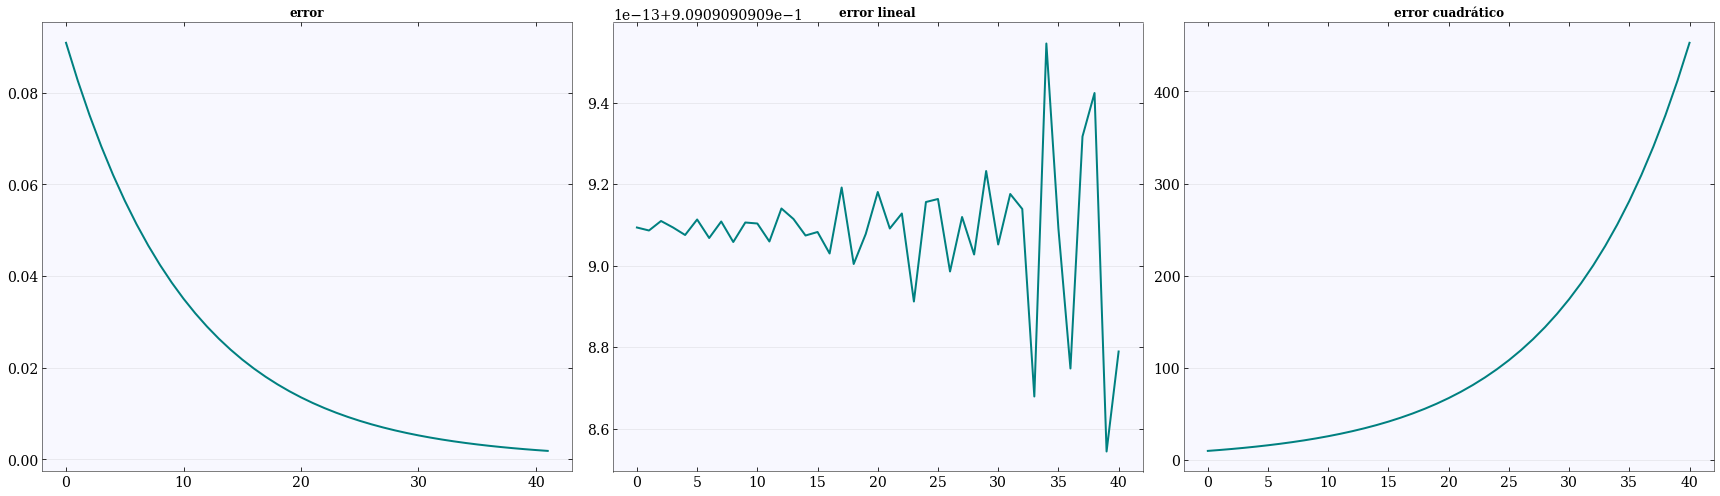

In [18]:
plt.figure(figsize=(24,7))
# grafico del error
plt.subplot(1, 3, 1)
plt.plot(E)
plt.title("error")

plt.subplot(1, 3, 2)
plt.plot(Elin)
plt.title("error lineal");
plt.subplot(1, 3, 3)
plt.plot(Ecuad)
plt.title("error cuadrático");


Ahora para la segunda función

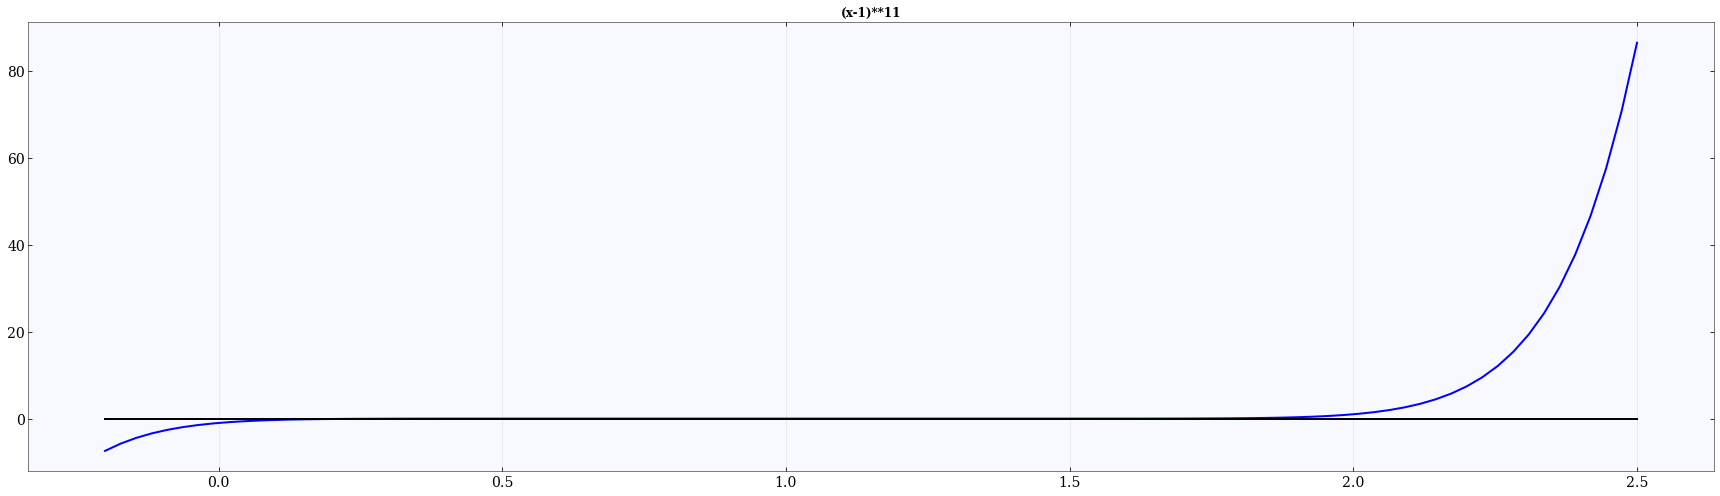

In [22]:
# grafiquemos la función plana
a=-0.2; b=2.5  # extremos del intervalo
x = np.linspace(a, b, 100)
fun_plana_vec=np.vectorize(fun_plana)

plt.figure(figsize=(24,7))
plt.plot(x, fun_plana_vec(x),'b')
plt.plot([a,b],[0,0],'k')  # eje x
plt.title('(x-1)**11'); 
plt.grid(axis='both')

In [23]:
# lo ejecutemos para la función fun_plana
solplana=rNewton(fun_plana,Dfun_plana,2)
print(solplana)
# ahora recuperemos todos los puntos de la sucesión
hisplana=rNewton(fun_plana,Dfun_plana,2,historico=True)
print(hisplana)

La derivada de la función es  4.533826731038989e-17
1.0182602712001487
La derivada de la función es  4.533826731038989e-17
[2, 1.9090909090909092, 1.8264462809917357, 1.751314800901578, 1.6830134553650709, 1.6209213230591553, 1.5644739300537776, 1.5131581182307068, 1.4665073802097335, 1.424097618372485, 1.3855432894295319, 1.3504938994813926, 1.318630817710357, 1.2896643797366882, 1.2633312543060802, 1.2393920493691637, 1.2176291357901488, 1.1978446689001352, 1.179858789909214, 1.163507990826558, 1.1486436280241437, 1.1351305709310398, 1.1228459735736724, 1.1116781577942476, 1.1015255979947705, 1.0922959981770641, 1.0839054528882401, 1.0762776844438546, 1.0693433494944133, 1.0630394086312849, 1.0573085533011681, 1.0520986848192437, 1.047362440744767, 1.0430567643134245, 1.039142513012204, 1.0355841027383674, 1.0323491843076067, 1.0294083493705515, 1.0267348630641377, 1.024304420967398, 1.0220949281521798, 1.0200862983201635, 1.0182602712001487]


In [24]:
print("cantidad de iteraciones= ",len(hisplana))
hisplana=np.array(hisplana)
E=abs(hisplana[1:]-hisplana[:-1])
print(E)
Elin=E[1:]/E[:-1]
Ecuad=E[1:]/E[:-1]**2
print(Elin)
print(Ecuad)

cantidad de iteraciones=  43
[0.09090909 0.08264463 0.07513148 0.06830135 0.06209213 0.05644739
 0.05131581 0.04665074 0.04240976 0.03855433 0.03504939 0.03186308
 0.02896644 0.02633313 0.0239392  0.02176291 0.01978447 0.01798588
 0.0163508  0.01486436 0.01351306 0.0122846  0.01116782 0.01015256
 0.0092296  0.00839055 0.00762777 0.00693433 0.00630394 0.00573086
 0.00520987 0.00473624 0.00430568 0.00391425 0.00355841 0.00323492
 0.00294083 0.00267349 0.00243044 0.00220949 0.00200863 0.00182603]
[0.90909091 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091
 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091
 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091
 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091
 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091
 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091
 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091]
[ 10.          11.          12.1         1

Text(0.5, 1.0, 'error cuadrático')

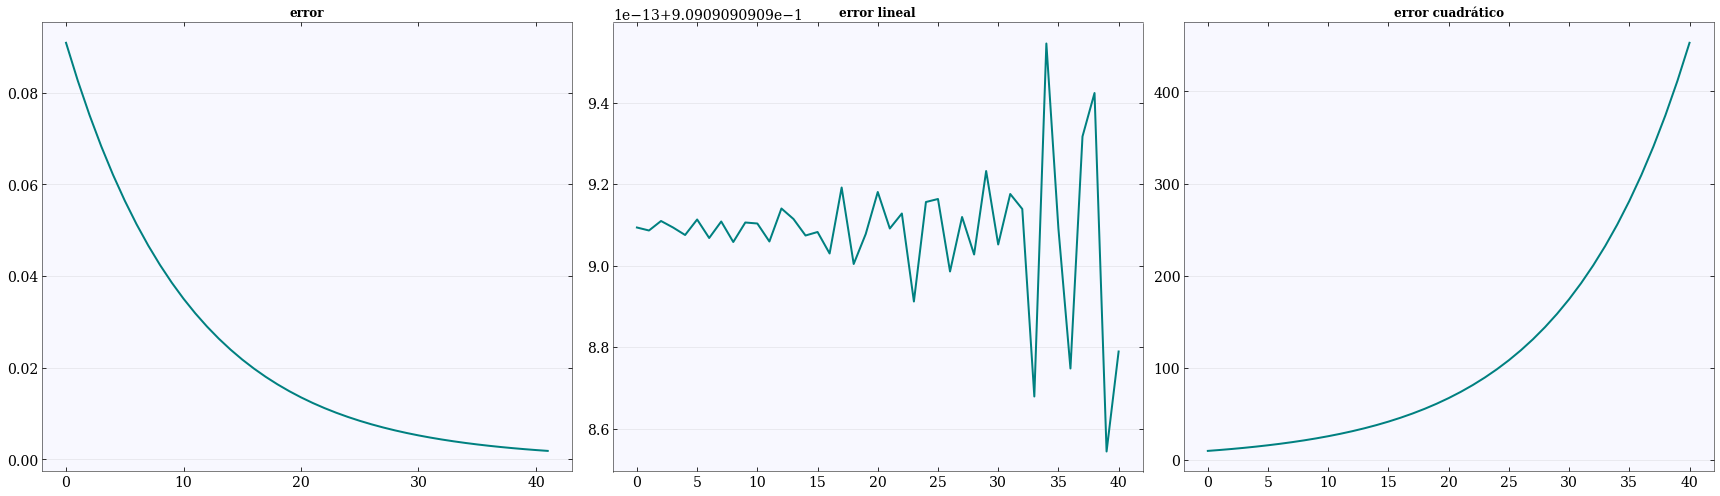

In [28]:
plt.figure(figsize=(24, 7))
# grafico del error
plt.subplot(1, 3, 1)
plt.plot(E)
plt.title("error")
plt.subplot(1, 3, 2)
plt.plot(Elin)
plt.title("error lineal");
plt.subplot(1, 3, 3)
plt.plot(Ecuad)
plt.title("error cuadrático")